In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/완성data/dataset_1/scaling_data_2vs1.csv')
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.00000,0.20000,0.097721,0.909954,0.623444,0.010,0.20000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.00000,0.13333,0.025235,0.912567,0.618330,0.100,0.13333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0.26627,0.23669,0.029928,0.905159,0.611608,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.28182,0.22727,0.037046,0.902408,0.610555,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,0.50000,0.33333,0.074258,0.912311,0.622280,0.009,0.48333,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17197,0.02609,0.12174,0.051038,0.908621,0.616634,0.150,0.53000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17198,0.51149,0.13218,0.053088,0.902259,0.611604,0.080,0.88000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17199,0.44444,0.33333,0.065466,0.898708,0.606244,0.040,0.66667,0,0,1,...,0,0,0,0,0,1,0,0,0,1


# SHAP - 교차검증과 동시에 진행

In [3]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
import shap
from sklearn.model_selection import StratifiedKFold

In [5]:
# X와 y 변수를 설정합니다 (이미 전처리와 인코딩이 완료된 상태로 가정합니다)
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# SHAP 값을 저장할 빈 배열을 초기화합니다
shap_values = np.zeros((len(X), X.shape[1]))

# Stratified 5-fold 교차검증을 초기화합니다
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차검증을 수행합니다
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # CatBoost 모델을 생성하고 훈련합니다
    model = CatBoostClassifier(iterations=100, random_state=0, verbose=False)
    model.fit(X_train, y_train)

    # SHAP explainer를 생성합니다
    explainer = shap.Explainer(model)

    # 테스트 세트에 대한 SHAP 값을 계산합니다
    shap_values_fold = explainer.shap_values(X_test)

    # SHAP 값을 전체 배열에 추가합니다
    shap_values[test_idx] = shap_values_fold

# 평균 SHAP 값을 계산합니다
avg_shap_values = np.mean(shap_values, axis=0)

# 평균 SHAP 값을 출력합니다
print("평균 SHAP 값:")
print(avg_shap_values)

평균 SHAP 값:
[ 4.13357114e-02 -1.00279310e-02 -1.04111616e-02  1.66993200e-02
 -5.79212304e-03  1.38347043e-03  4.66332490e-03 -6.15178395e-05
 -2.91060209e-03  2.36401622e-03  3.70891490e-03 -2.81082607e-03
 -2.36265026e-03 -4.14353542e-04 -1.65094096e-03 -3.41434230e-04
 -1.17957154e-03  5.19868258e-03  5.69727257e-03  1.04782531e-03
 -1.21602992e-03 -1.24112349e-04  4.51757982e-04  2.38938832e-03
 -1.19007756e-03  3.72053734e-03 -1.90995456e-03  3.31919786e-03
 -1.73824853e-03  4.08355687e-03  2.42367415e-03  5.59943620e-04
 -2.33154590e-03 -2.24111020e-04  1.72512143e-03  1.59740547e-04
  2.48653936e-04 -1.40583559e-04]


In [7]:
df_result = pd.DataFrame(index=X.columns)

df_result['평균 SHAP'] =avg_shap_values
df_result

,평균 SHAP
부서별_인력구성(생산),0.041336
부서별_인력구성(RnD),-0.010028
총자산회전율,-0.010411
순이익률,0.016699
ROE,-0.005792
주력제품 국내 시장점유율(퍼센트),0.001383
학력별 인력구성비(대졸),0.004663
엔젤투자자 혹은 액셀러레이터 투자 경험여부,-0.000062
창업 당시 창업자 최종학력_1,-0.002911
창업 당시 창업자 최종학력_2,0.002364


# 교차검증과 SHAP값 따로 진행

## Catboost 교차검증

In [8]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# CatBoost 모델 생성
model = CatBoostClassifier(verbose=False)

# Stratified 5-fold 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차검증 결과 저장 변수
accuracy_scores = []
f1_scores = []
recall_scores = []
confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    # 학습 데이터와 검증 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # CatBoost 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # 결과 저장
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    confusion_matrices.append(confusion)

# 평균 정확도, F1 점수, 재현율 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean F1 Score:', np.mean(f1_scores))
print('Mean Recall:', np.mean(recall_scores))

# 혼돈 행렬 출력
for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix {i+1}:')
    print(confusion)
    print()


Mean Accuracy: 0.91285319640721
Mean F1 Score: 0.8659749325322419
Mean Recall: 0.8446124726313885
Confusion Matrix 1:
[[2198   96]
 [ 162  985]]

Confusion Matrix 2:
[[2174  119]
 [ 197  950]]

Confusion Matrix 3:
[[2159  134]
 [ 193  954]]

Confusion Matrix 4:
[[2168  125]
 [ 170  977]]

Confusion Matrix 5:
[[2160  134]
 [ 169  977]]



## SHAP 계산 및 시각화

In [9]:
from sklearn.model_selection import train_test_split
shap.initjs() # javascript 초기화 (graph 초기화)

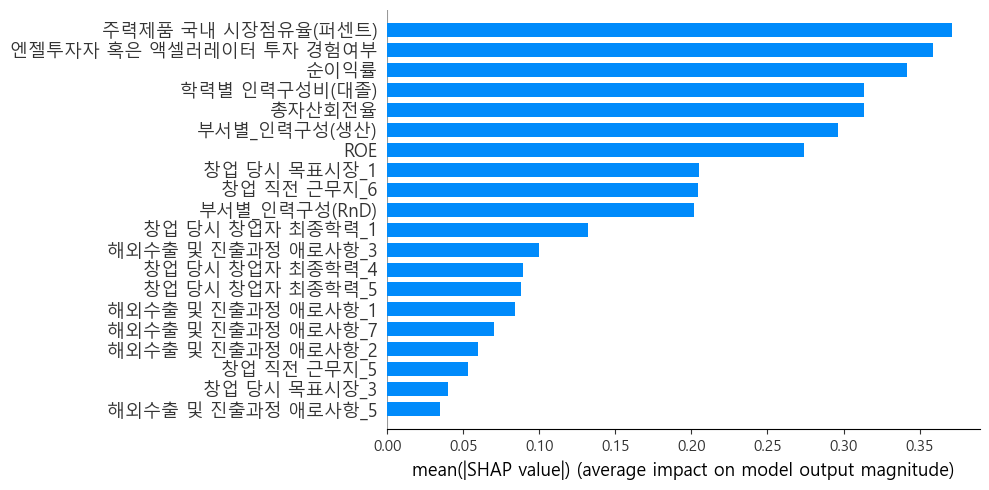

In [10]:
# 특징 변수와 타겟 변수 분리
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 학습
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

# Tree SHAP Explainer 생성
explainer = shap.TreeExplainer(model)

# Tree SHAP 값을 계산
shap_values = explainer.shap_values(X_test)

# 특정 샘플의 Shap 요약 확인
sample_index = 0
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", plot_size=(10, 5))

# 특정 샘플의 Shap 값 확인
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index, :], feature_names=X.columns)

In [11]:
feature_name = X.columns

for i in range(X.shape[1]):
    feature_imp = np.mean(np.abs(shap_values[:, i]))
    print(f'{feature_name[i]}의 중요도 :', feature_imp)

부서별_인력구성(생산)의 중요도 : 0.29635353246916774
부서별_인력구성(RnD)의 중요도 : 0.20141086740003328
총자산회전율의 중요도 : 0.31315522865940293
순이익률의 중요도 : 0.3419458666010505
ROE의 중요도 : 0.274073473912881
주력제품 국내 시장점유율(퍼센트)의 중요도 : 0.37114740375480176
학력별 인력구성비(대졸)의 중요도 : 0.31322188460747513
엔젤투자자 혹은 액셀러레이터 투자 경험여부의 중요도 : 0.3588547104459933
창업 당시 창업자 최종학력_1의 중요도 : 0.13194824540176112
창업 당시 창업자 최종학력_2의 중요도 : 0.023625236855199534
창업 당시 창업자 최종학력_3의 중요도 : 0.023019375127317325
창업 당시 창업자 최종학력_4의 중요도 : 0.08920495407023547
창업 당시 창업자 최종학력_5의 중요도 : 0.08796564042633215
창업 직전 근무지_1의 중요도 : 0.002372016914552302
창업 직전 근무지_2의 중요도 : 0.0033588420765274
창업 직전 근무지_3의 중요도 : 0.007830853070132612
창업 직전 근무지_4의 중요도 : 0.007337041581155892
창업 직전 근무지_5의 중요도 : 0.05326880229187714
창업 직전 근무지_6의 중요도 : 0.20407434536732386
창업 직전 근무지_7의 중요도 : 0.024683809882066542
창업 직전 근무지_8의 중요도 : 0.015283600754147225
창업 직전 근무지_9의 중요도 : 0.005590882367056411
창업 직전 근무지_10의 중요도 : 0.00982940148374547
창업 당시 목표시장_1의 중요도 : 0.20500704824867125
창업 당시 목표시장_2의 중요도 : 0.01703566

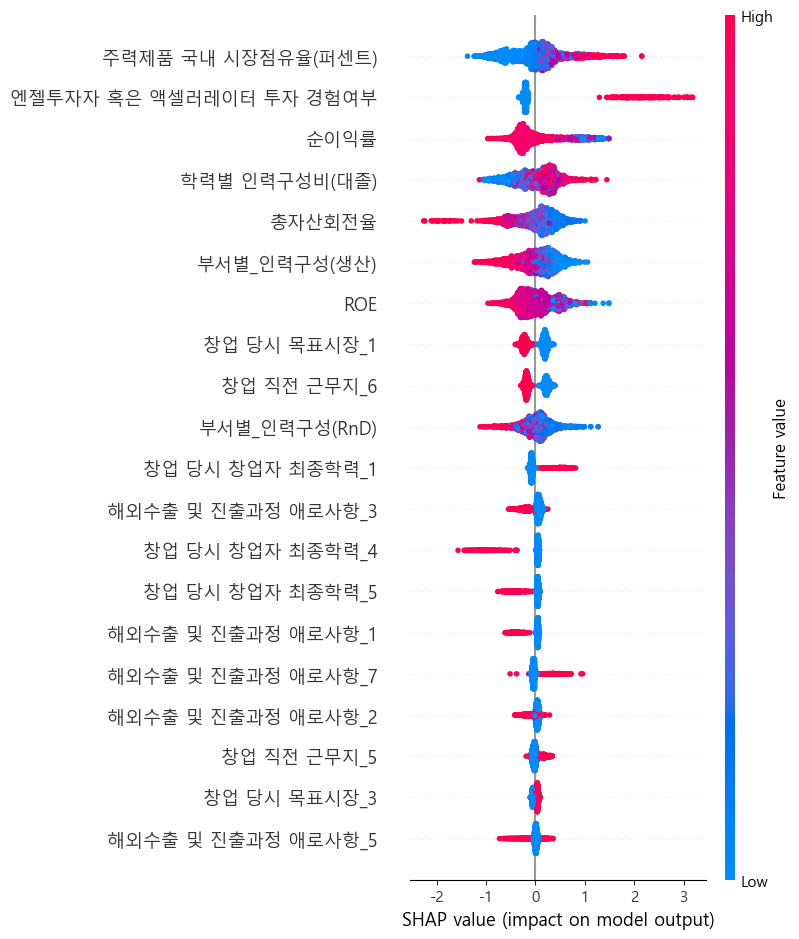

In [12]:
# summary
shap.summary_plot(shap_values, X_test)

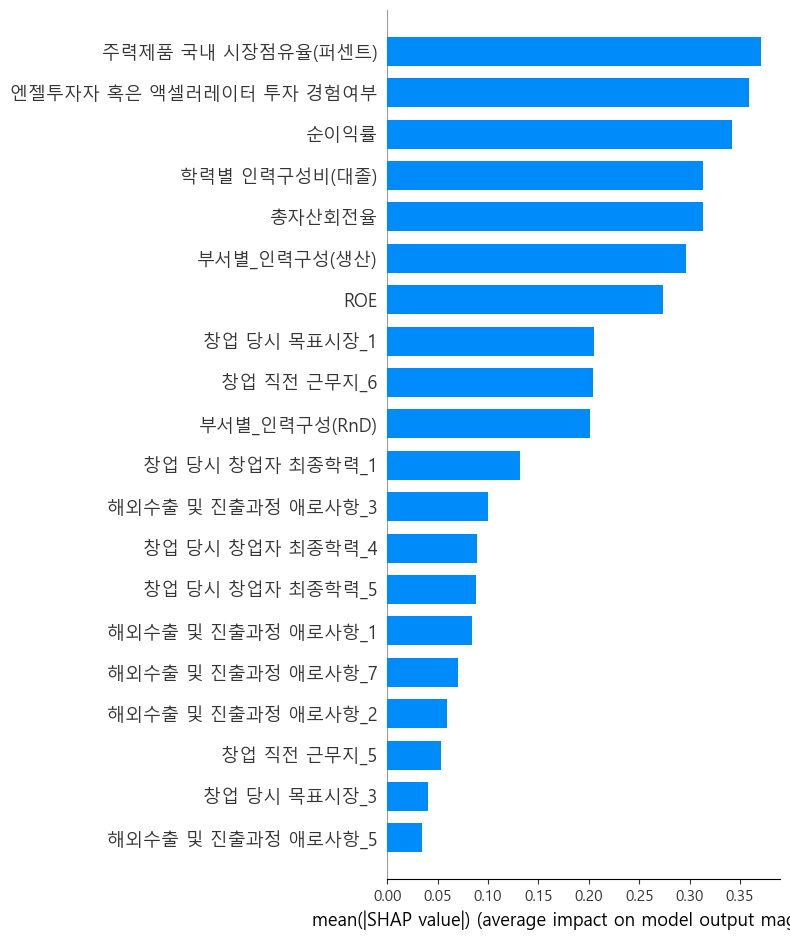

In [14]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

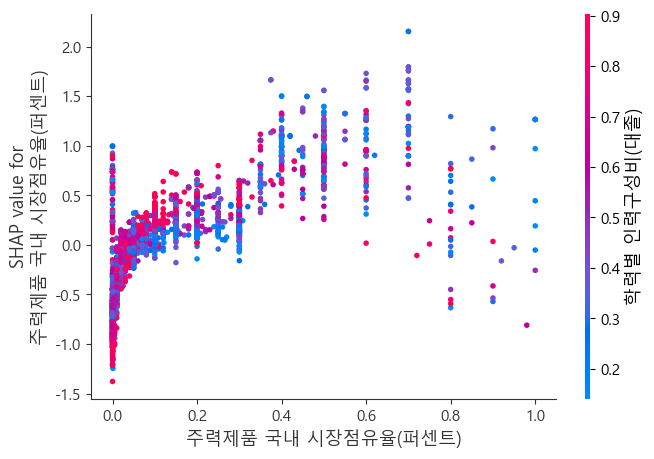

In [13]:
 # 변수 간의 shap value 파악
shap.dependence_plot("주력제품 국내 시장점유율(퍼센트)", shap_values, X_test)

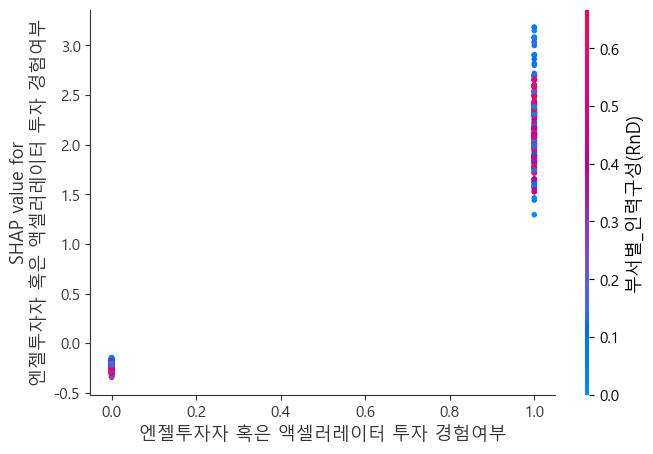

In [15]:
 # 변수 간의 shap value 파악
shap.dependence_plot("엔젤투자자 혹은 액셀러레이터 투자 경험여부", shap_values, X_test)

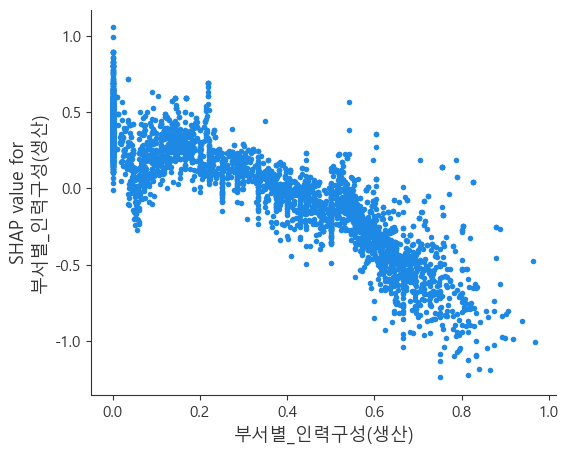

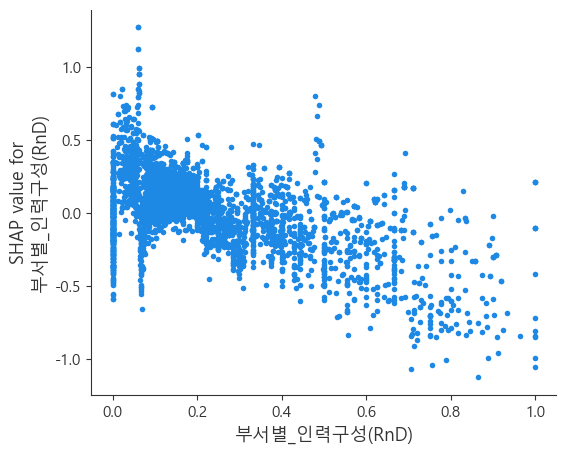

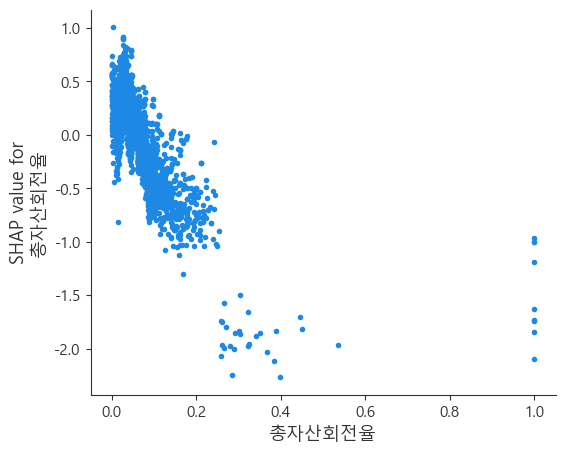

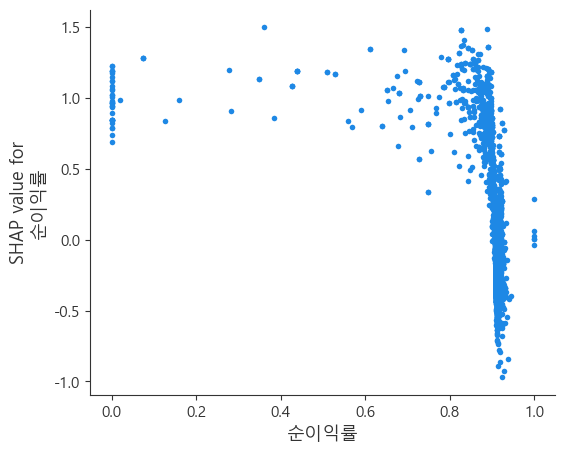

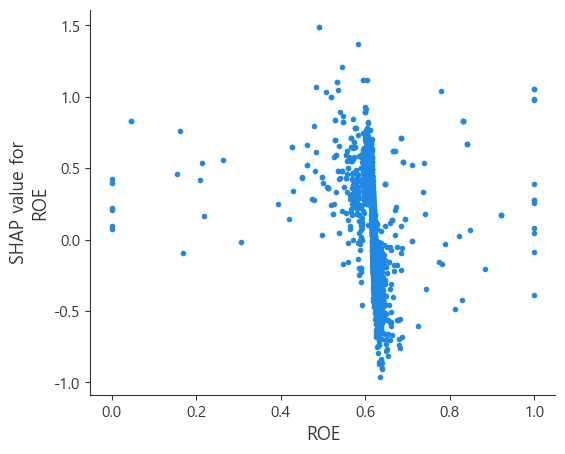

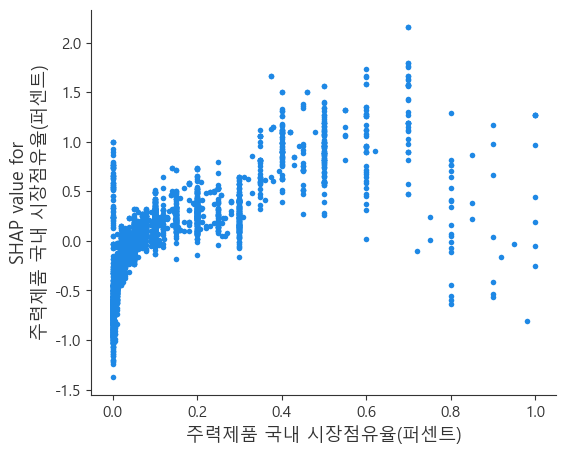

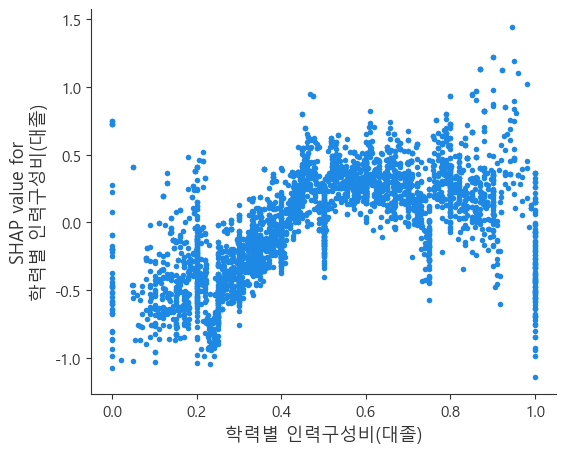

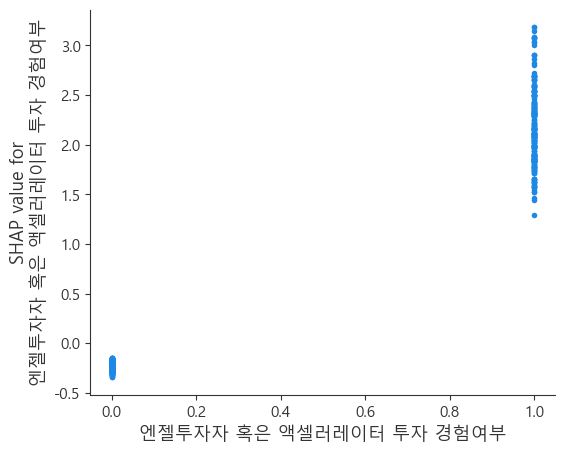

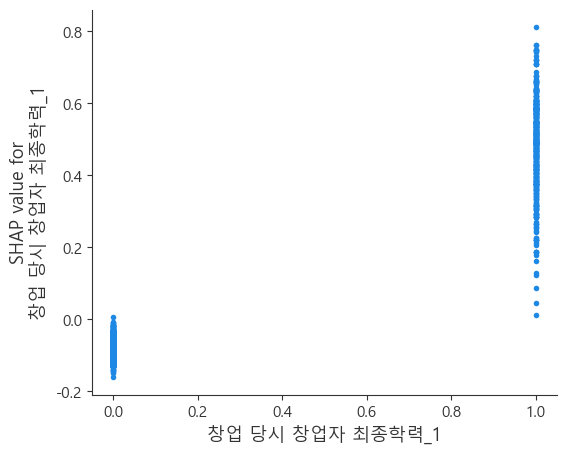

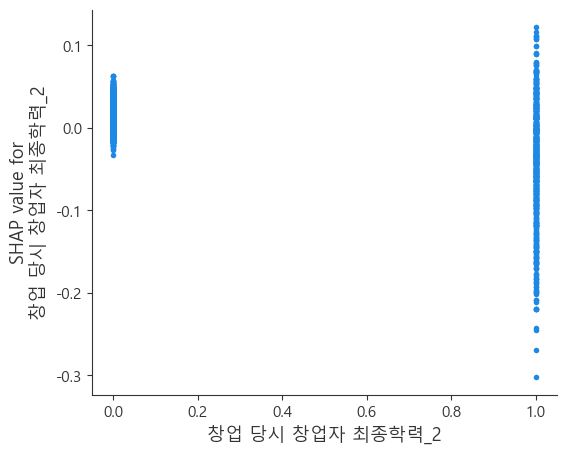

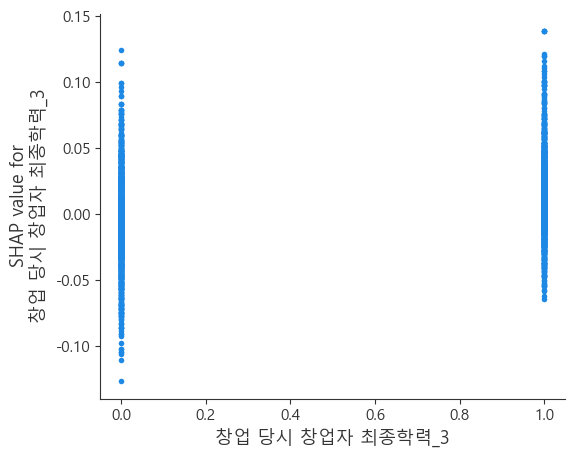

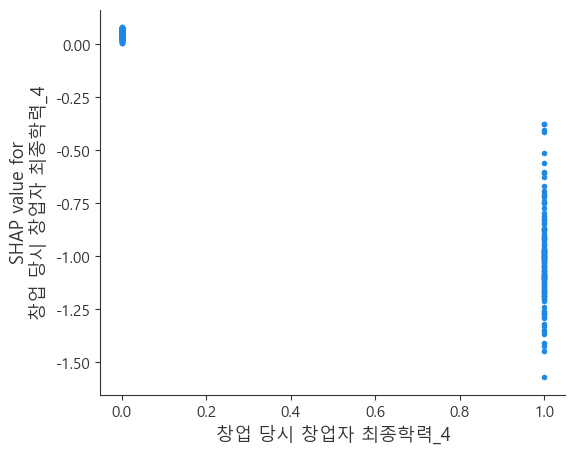

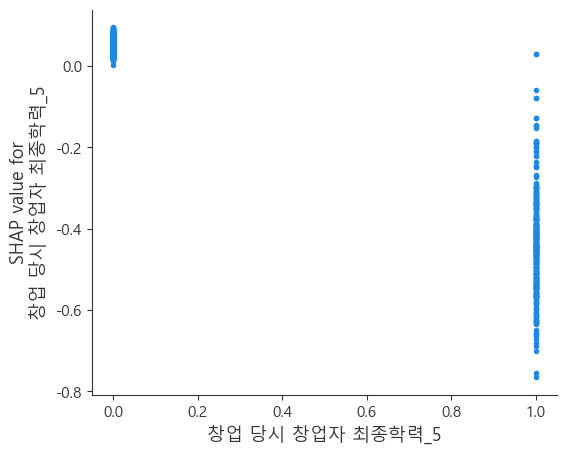

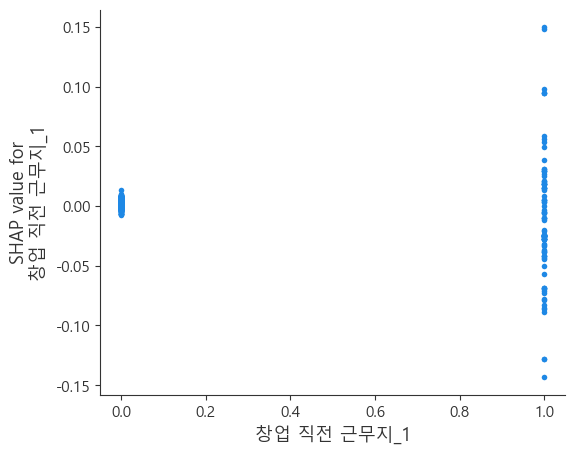

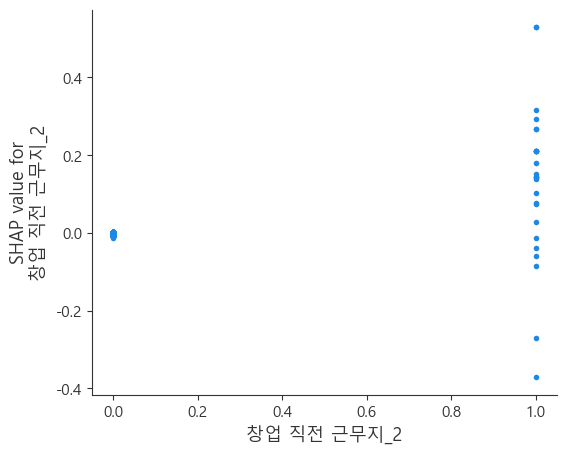

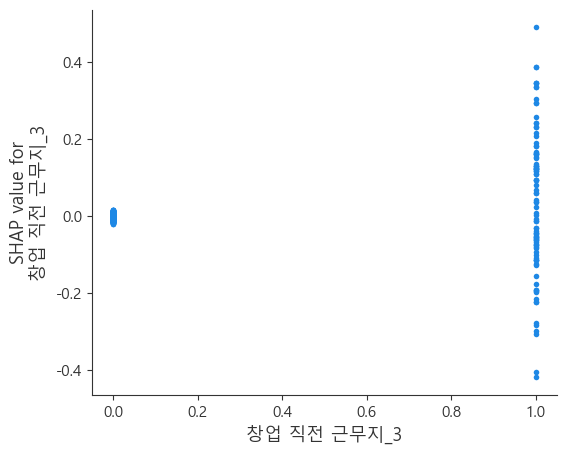

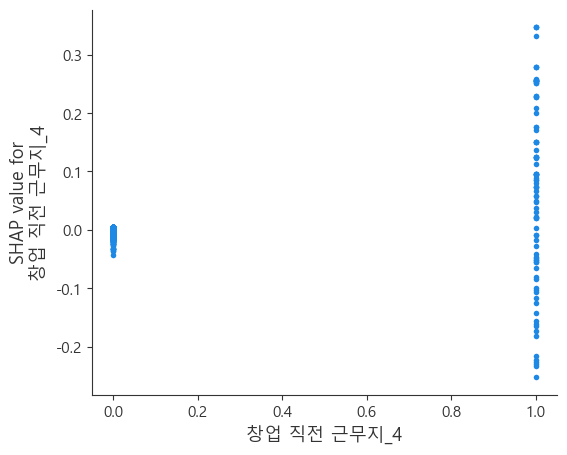

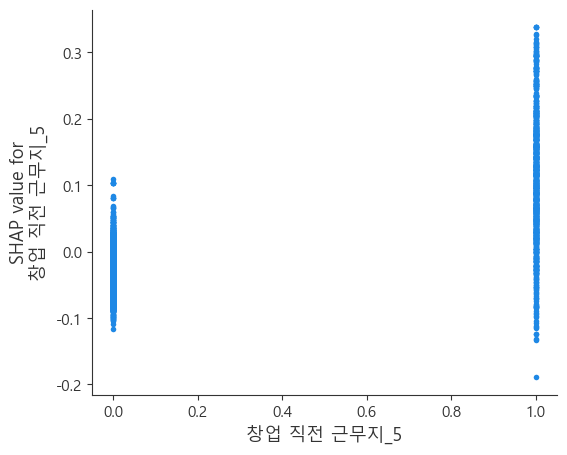

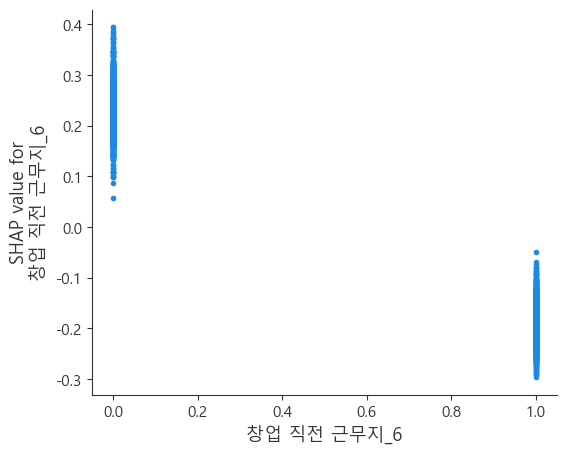

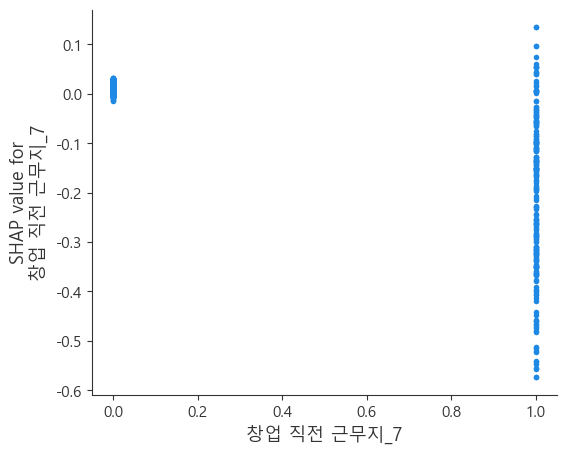

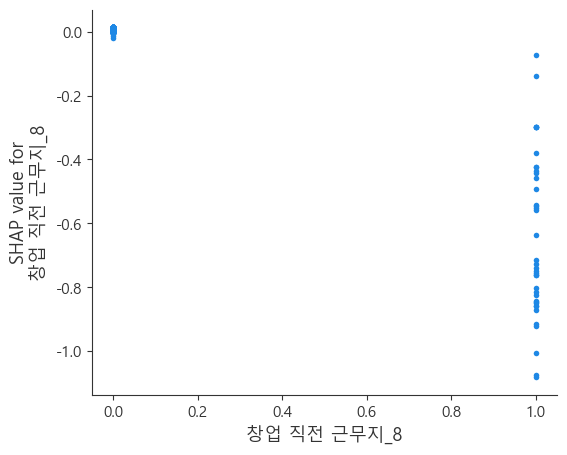

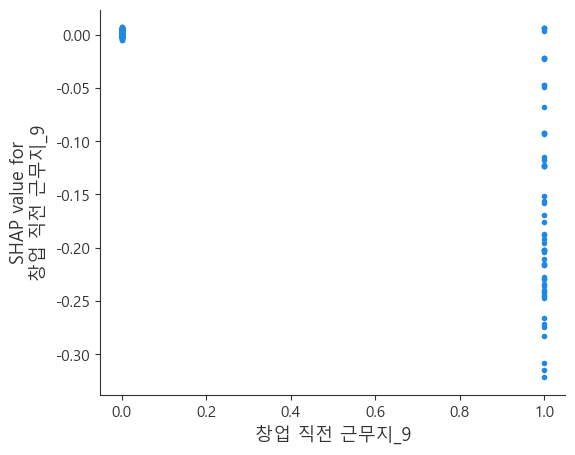

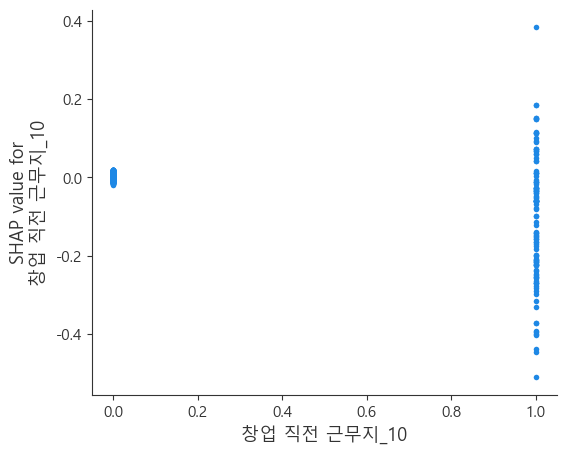

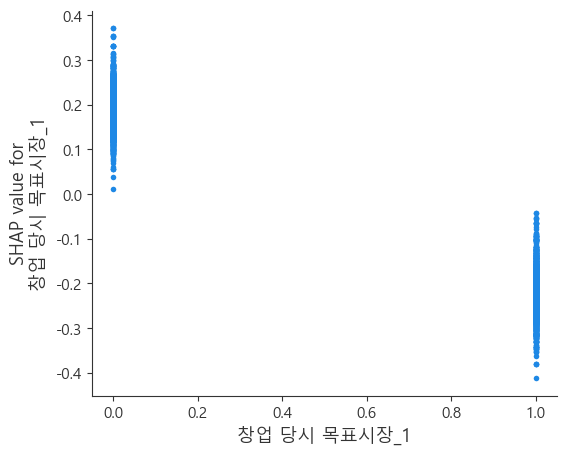

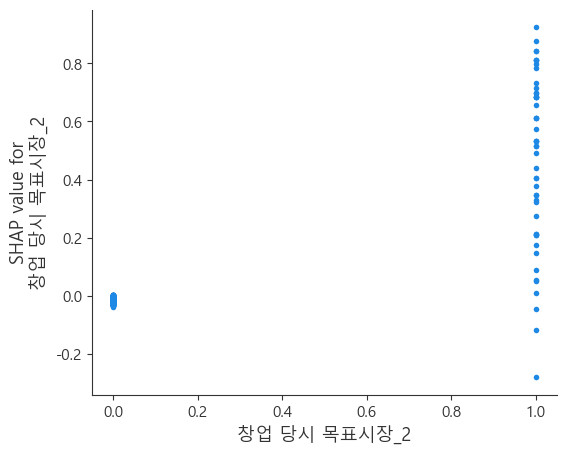

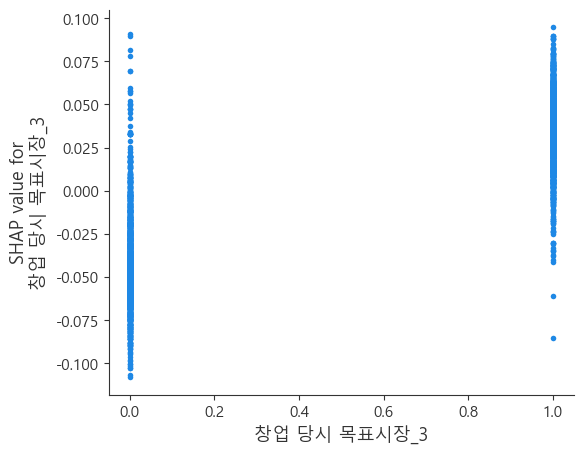

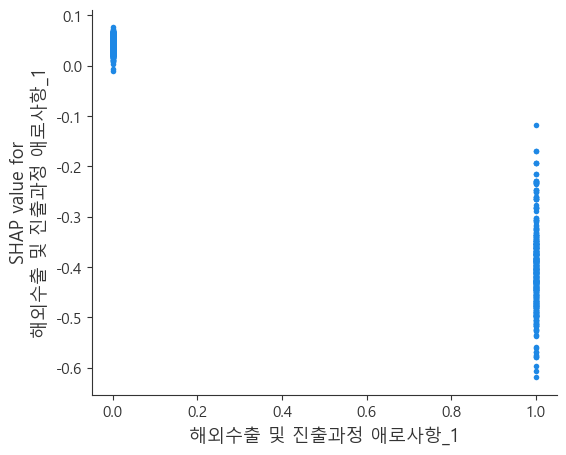

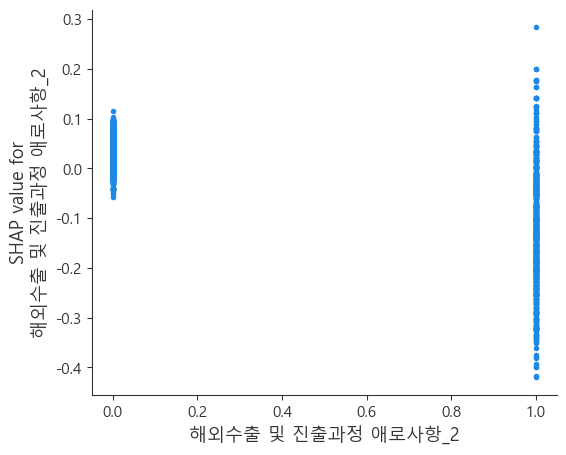

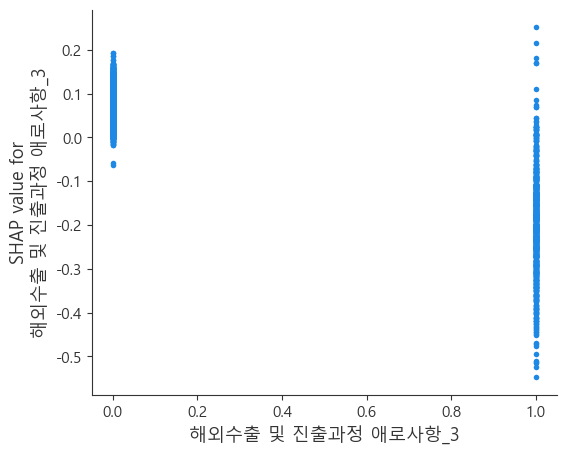

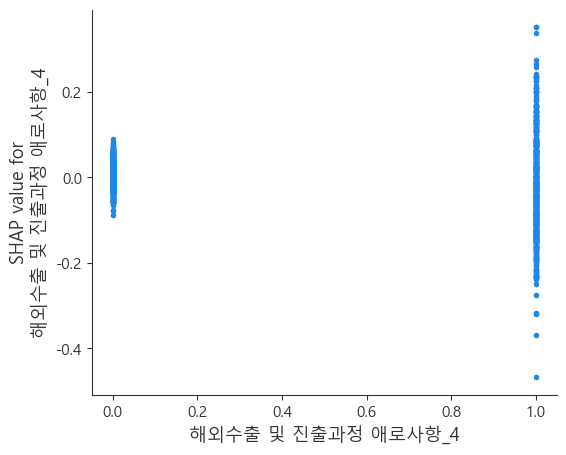

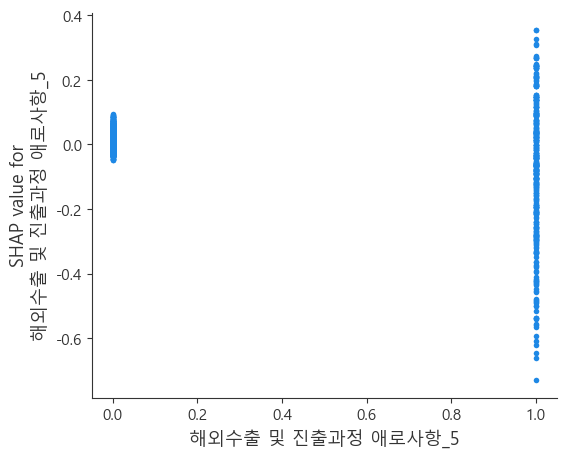

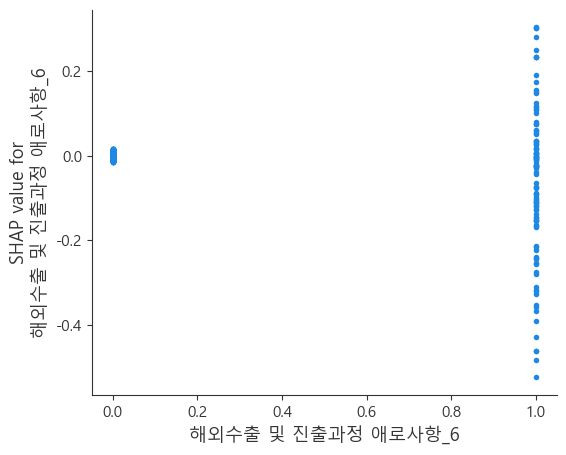

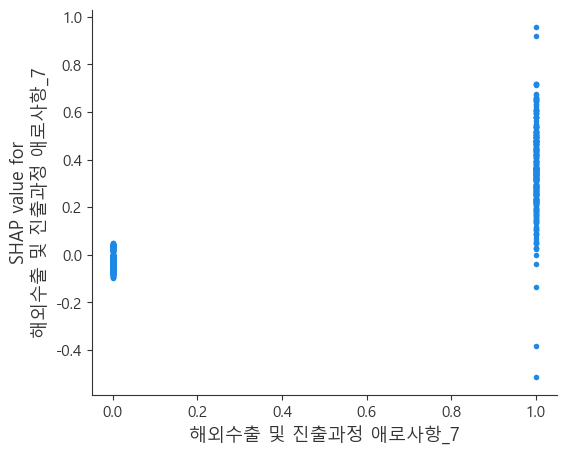

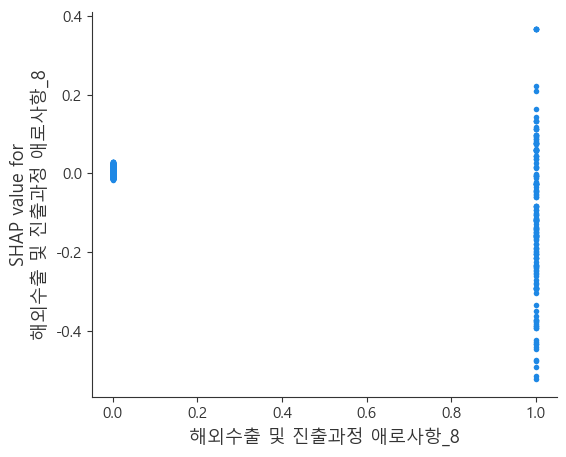

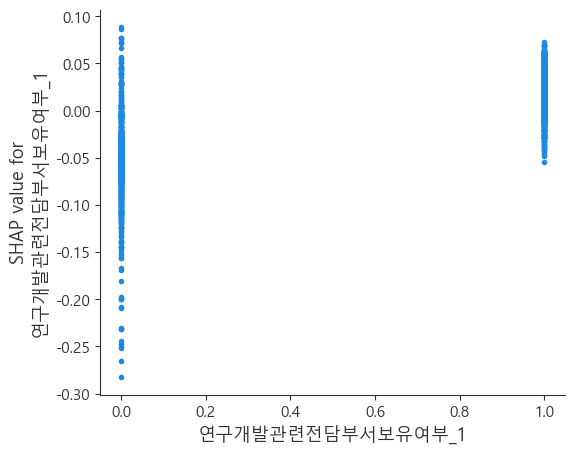

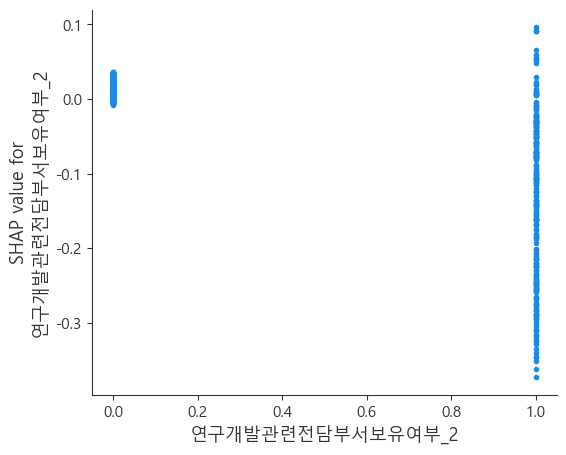

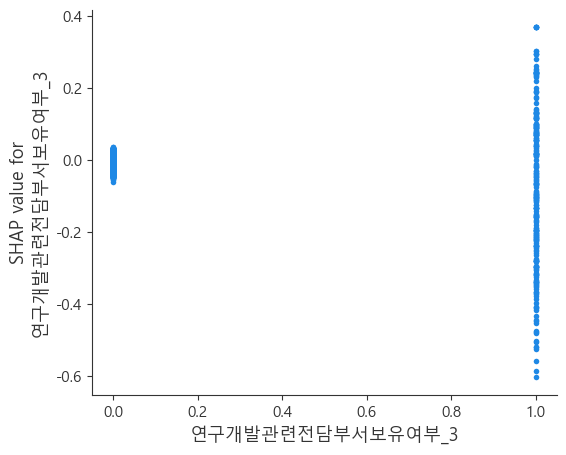

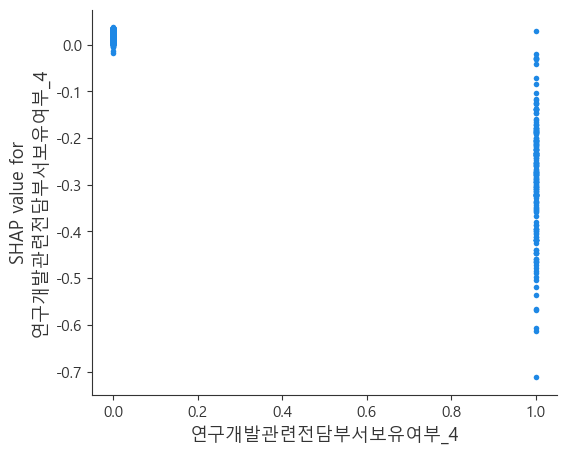

In [16]:
import shap
import matplotlib.pyplot as plt

# 변수 리스트 생성
feature_names = X_test.columns

# 각 변수에 대한 shap.dependence_plot 생성
for feature in feature_names:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)
    plt.show()


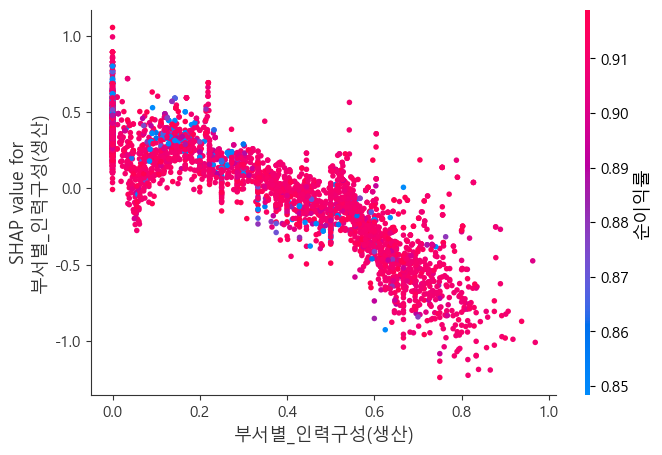

In [17]:
import shap
import matplotlib.pyplot as plt

# '부서별_인력구성(생산)' 변수와 '순이익률' 변수의 인덱스 찾기
feature_index = X.columns.get_loc('부서별_인력구성(생산)')
target_index = X.columns.get_loc('순이익률')

# shap.dependence_plot 생성
shap.dependence_plot(feature_index, shap_values, X_test, interaction_index=target_index)
plt.show()